In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
from sklearn.datasets import make_circles

In [109]:
X, Y = make_circles( n_samples=1000,
    shuffle=True,
    noise=0.4,
    random_state=3,
    factor=0.2)

In [110]:
print(X.shape, Y.shape)

(1000, 2) (1000,)


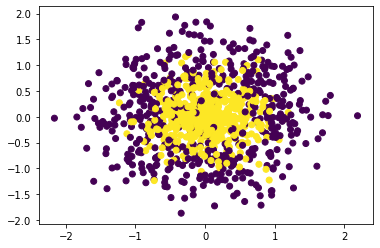

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [112]:
input_size = 2
layers = [4, 3]
output = 2

In [113]:
# a = np.array([[10, 20], [30, 40]])
# print(np.sum(a, axis = 1, keepdims=True))

In [114]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [115]:
softmax(np.array([[10, 20], [20, 20]])) # higher the activation higher the probablity

array([[4.53978687e-05, 9.99954602e-01],
       [5.00000000e-01, 5.00000000e-01]])

In [116]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [117]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [118]:
one_hot(np.array([0, 0, 1, 2]), 3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [119]:
model = NeuralNetwork(input_size=2,  layers=layers, output_size=2)

In [120]:
model.forward(X)[:5]

array([[0.62216755, 0.37783245],
       [0.93744607, 0.06255393],
       [0.993415  , 0.006585  ],
       [0.86461463, 0.13538537],
       [0.61512481, 0.38487519]])

In [121]:
model.backward(X, one_hot(Y,  2))

In [122]:
# def train(x, y):
#     losses = []
#     y_oht = one_hot(y, depth=2)
#     for i in range(100):
#         y_ = model.forward(X)
#         l = loss(y_oht, y_)
#         losses.append(l)
#         if l >= 0.01:
#             model.backward(X, y_oht)
            
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    losses = []
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        losses.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%10==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    
    return losses
    #model.summary()
            

In [123]:
losses = train(X, Y, model, epochs=700)

Epoch 0 Loss 0.6165
Epoch 10 Loss 0.2915
Epoch 20 Loss 0.2617
Epoch 30 Loss 0.3172
Epoch 40 Loss 0.2381
Epoch 50 Loss 0.2273
Epoch 60 Loss 0.2300
Epoch 70 Loss 0.2342
Epoch 80 Loss 0.2206
Epoch 90 Loss 0.2184
Epoch 100 Loss 0.2225
Epoch 110 Loss 0.2209
Epoch 120 Loss 0.2164
Epoch 130 Loss 0.2155
Epoch 140 Loss 0.2164
Epoch 150 Loss 0.2155
Epoch 160 Loss 0.2137
Epoch 170 Loss 0.2128
Epoch 180 Loss 0.2127
Epoch 190 Loss 0.2125
Epoch 200 Loss 0.2119
Epoch 210 Loss 0.2114
Epoch 220 Loss 0.2111
Epoch 230 Loss 0.2110
Epoch 240 Loss 0.2108
Epoch 250 Loss 0.2106
Epoch 260 Loss 0.2104
Epoch 270 Loss 0.2102
Epoch 280 Loss 0.2102
Epoch 290 Loss 0.2101
Epoch 300 Loss 0.2100
Epoch 310 Loss 0.2099
Epoch 320 Loss 0.2098
Epoch 330 Loss 0.2097
Epoch 340 Loss 0.2097
Epoch 350 Loss 0.2096
Epoch 360 Loss 0.2095
Epoch 370 Loss 0.2095
Epoch 380 Loss 0.2094
Epoch 390 Loss 0.2094
Epoch 400 Loss 0.2093
Epoch 410 Loss 0.2093
Epoch 420 Loss 0.2092
Epoch 430 Loss 0.2092
Epoch 440 Loss 0.2091
Epoch 450 Loss 0.2091

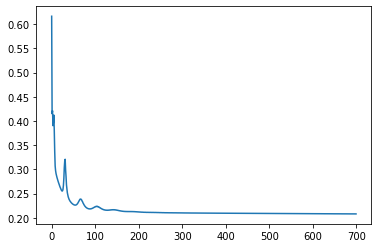

In [124]:
plt.plot(losses);

In [125]:
import sys
sys.path.insert(0, '../resources/')

In [126]:
from visualize import plot_decision_boundary

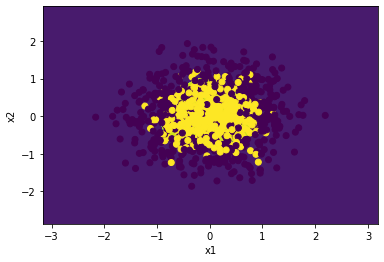

In [127]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [128]:
model.summary()

W1  (2, 4)
A1  (368880, 4)
W2  (4, 3)
A2  (368880, 3)
W3  (3, 2)
Y_  (368880, 2)
